# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Generate Cities List

In [72]:
#create df for cities

city_df = pd.DataFrame(columns=["City","Country"])

#generate random cities

for x in range(1500):
    lat, lon = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat,lon)
    city_df = city_df.append({"City": city.city_name,"Country": city.country_code}, ignore_index=True)
    
#city_df['City'].nunique()
city_df = city_df.drop_duplicates(subset="City").reset_index()
city_df.count()

index      619
City       619
Country    619
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [160]:
#create df to hold api data

column_names = ["City", "Country", "Temperature", "Cloudiness", "Humidity", "Wind Speed", "Latitude", "Longitude", "Date"]
new_city = pd.DataFrame(columns=column_names)

#apicall

url = "https://api.openweathermap.org/data/2.5/weather?"

row = 1

print('getting data')
for index, row in city_df.iterrows():
    city1 = row["City"]
    url1 = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + city1.replace(" ","+")
    city_data = requests.get(url1).json()
    
    if city_data["cod"] == "404":
       print("City not found, skipping...")
    
    else:
       new_city.set_value(index, "City", city_data["name"])
       new_city.set_value(index, "Country", city_data["sys"]["country"])
       new_city.set_value(index, "Temperature", city_data["main"]["temp"])
       new_city.set_value(index, "Latitude", city_data["coord"]["lat"])
       new_city.set_value(index, "Longitude", city_data["coord"]["lon"])
       new_city.set_value(index, "Humidity", city_data["main"]["humidity"])
       new_city.set_value(index, "Cloudiness", city_data["clouds"]["all"])
       new_city.set_value(index, "Wind Speed", city_data["wind"]["speed"])
        
       print("Proceesing" , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
       row_count += 1

getting data


/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] acc

Proceesing 616  |  Pangnirtung CA
Proceesing 617  |  Avarua CK
City not found, skipping...
City not found, skipping...
Proceesing 618  |  Ushuaia AR
Proceesing 619  |  Merauke ID
Proceesing 620  |  Anadyr RU
Proceesing 621  |  Bluff AU
Proceesing 622  |  Hamilton CA
Proceesing 623  |  Fairbanks US
Proceesing 624  |  Moosomin CA
Proceesing 625  |  Veraval FR
Proceesing 626  |  Thompson CA
Proceesing 627  |  Te Anau NZ
Proceesing 628  |  Kiruna SE
Proceesing 629  |  Pacific Grove US
Proceesing 630  |  Hilo US
City not found, skipping...
City not found, skipping...
Proceesing 631  |  Moose Factory CA
Proceesing 632  |  Zhezkazgan KZ
Proceesing 633  |  Kapaa US
Proceesing 634  |  Sihora IN
City not found, skipping...
Proceesing 635  |  Raudeberg NO
Proceesing 636  |  Arraial do Cabo BR
Proceesing 637  |  Chokurdakh RU
Proceesing 638  |  Butaritari KI
Proceesing 639  |  Talnakh RU
Proceesing 640  |  Norman Wells CA
Proceesing 641  |  Tasiilaq GL
City not found, skipping...
Proceesing 642  |

Proceesing 852  |  Balikpapan ID
Proceesing 853  |  Baruun-Urt MN
Proceesing 854  |  Det Udom TH
Proceesing 855  |  Tairua NZ
Proceesing 856  |  Iberia PE
Proceesing 857  |  Labuhan ID
Proceesing 858  |  Charters Towers AU
Proceesing 859  |  Bowmore US
Proceesing 860  |  Suntar RU
Proceesing 861  |  Buin CL
Proceesing 862  |  Sungaipenuh ID
Proceesing 863  |  Inhambane MZ
Proceesing 864  |  Bireun ID
Proceesing 865  |  Guerrero Negro MX
Proceesing 866  |  Owerri NG
Proceesing 867  |  Tuatapere NZ
Proceesing 868  |  Ilulissat GL
Proceesing 869  |  Boende CD
City not found, skipping...
Proceesing 870  |  Trinidad UY
Proceesing 871  |  Tlatlauquitepec MX
Proceesing 872  |  Hambantota LK
Proceesing 873  |  Sitka US
Proceesing 874  |  Moranbah AU
Proceesing 875  |  Taphan Hin TH
Proceesing 876  |  Sulangan PH
Proceesing 877  |  Cayenne GF
Proceesing 878  |  Airai TL
Proceesing 879  |  Belyy Yar RU
Proceesing 880  |  Dumai ID
Proceesing 881  |  Basco US
Proceesing 882  |  Okahandja NA
Procee

Proceesing 1093  |  George Town MY
Proceesing 1094  |  La Reforma GT
Proceesing 1095  |  Itajuba BR
Proceesing 1096  |  Ystad SE
Proceesing 1097  |  Leshukonskoye RU
Proceesing 1098  |  Ostrovnoy RU
Proceesing 1099  |  Grand Gaube MU
Proceesing 1100  |  Apac UG
City not found, skipping...
City not found, skipping...
Proceesing 1101  |  Polovinnoye RU
Proceesing 1102  |  Carauari BR
Proceesing 1103  |  Portland US
Proceesing 1104  |  Lafia NG
Proceesing 1105  |  Kaeo NZ
Proceesing 1106  |  Etampes FR
Proceesing 1107  |  Ulaangom MN
Proceesing 1108  |  Hofn IS
Proceesing 1109  |  Tevriz RU
Proceesing 1110  |  Coquimbo CL
Proceesing 1111  |  Nosy Varika MG
Proceesing 1112  |  Arona IT
Proceesing 1113  |  Chippewa Falls US
Proceesing 1114  |  Sao Joao da Barra BR
City not found, skipping...
Proceesing 1115  |  Ballina IE
Proceesing 1116  |  Laguna MX
Proceesing 1117  |  Kosh-Agach RU
Proceesing 1118  |  Flinders AU
Proceesing 1119  |  Nova Mayachka UA
Proceesing 1120  |  Qrendi MT
Proceesi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [161]:
new_city.to_csv("city_weather.csv",index=False)

In [162]:
new_city.head()

,City,Country,Temperature,Cloudiness,Humidity,Wind Speed,Latitude,Longitude,Date
0,Pangnirtung,CA,-23.81,20,74,2.24,66.15,-65.72,NaN
1,Avarua,CK,84.2,75,74,11.41,-21.21,-159.78,NaN
4,Ushuaia,AR,51.8,75,66,13.87,-54.81,-68.31,NaN
5,Merauke,ID,75.4,92,100,4.27,-8.49,140.4,NaN
6,Anadyr,RU,1.4,90,77,11.18,64.73,177.51,NaN


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

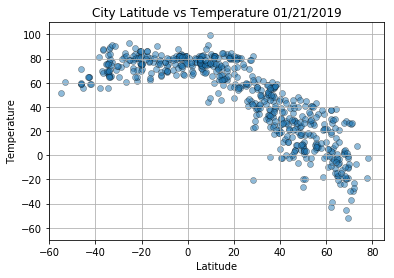

In [163]:
plt.scatter(new_city["Latitude"],
            new_city["Temperature"],
            edgecolor="black",
            linewidths=.5,
            cmap="plasma",
            alpha=.5,
            label="City")


plt.title(f"City Latitude vs Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,85])
plt.ylim([-70,110])

plt.show()

#### Latitude vs. Humidity Plot

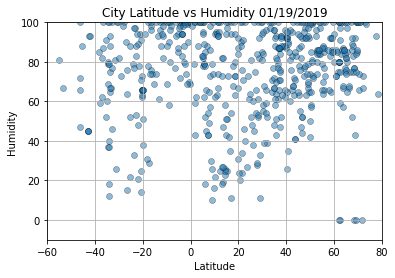

In [151]:
plt.scatter(new_city["Latitude"],
            new_city["Humidity"],
            edgecolor="black",
            linewidths=.5,
            cmap="plasma",
            alpha=.5,
            label="City")


plt.title(f"City Latitude vs Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,80])
plt.ylim([-10,100])

plt.show()

#### Latitude vs. Cloudiness Plot

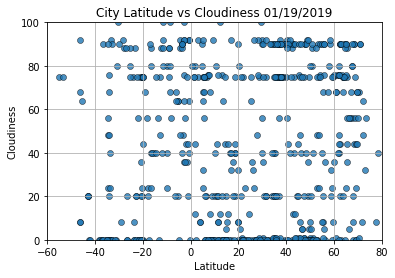

In [153]:
plt.scatter(new_city["Latitude"],
            new_city["Cloudiness"],
            edgecolor="black",
            linewidths=.5,
            cmap="plasma",
            alpha=.8,
            label="City")


plt.title(f"City Latitude vs Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,80])
plt.ylim([-0,100])

plt.show()

#### Latitude vs. Wind Speed Plot

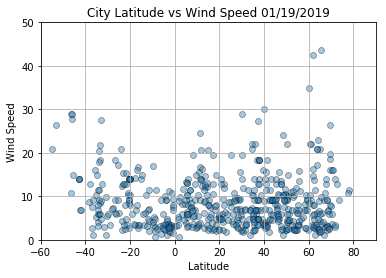

In [152]:
plt.scatter(new_city["Latitude"],
            new_city["Wind Speed"],
            edgecolor="black",
            linewidths=.8,
            cmap="plasma",
            alpha=.4,
            label="City")


plt.title(f"City Latitude vs Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([-0,50])

plt.show()